# Sentiment Analysis and Visualization of Stock News

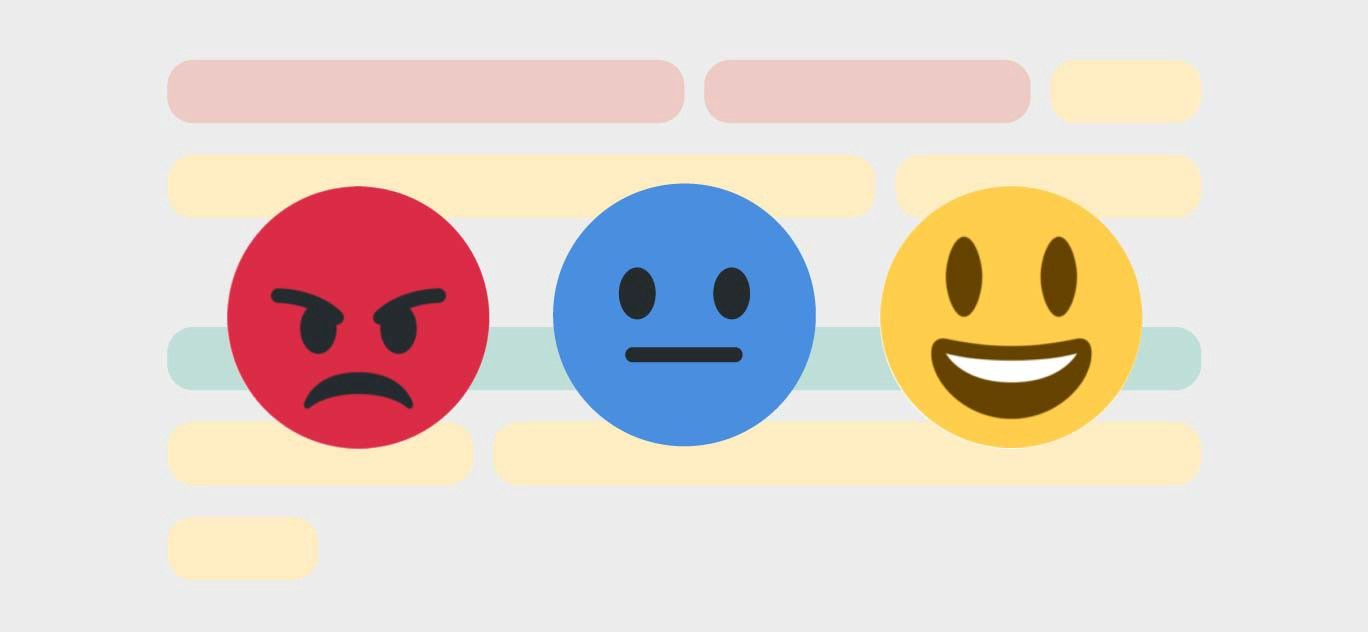

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd

## Extracting HTML data

In [2]:
tickers = list(['AAPL', 'AMZN', 'NFLX', 'GOOG'])

In [3]:
news_tables = {}

for t in tickers:
    url  = f'https://finviz.com/quote.ashx?t={t}'
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    
    soup = BeautifulSoup(response, 'html')
    news_table = soup.find(id='news-table')
    news_tables[t] = news_table
    
print(news_tables)

{'AAPL': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Jul-30-22 09:56AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.barrons.com/articles/alphabet-amazon-microsoft-tech-stocks-to-buy-51659118617?siteid=yhoof2" target="_blank">Big Techs Reign Isnt Over Yet. These Stocks Look Like Strong Buys.</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Barrons.com</span></div></div></td></tr>
<tr><td align="right" width="130">07:30AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/07/30/the-smartest-investors-know-about-this-1-key-devel/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">The Smartest Inv

## Parsing and Manipulating Finviz Data

In [4]:
aapl_data = news_tables['AAPL'] #base case
aapl_rows = aapl_data.findAll('tr')
print(aapl_rows)

[<tr><td align="right" style="white-space:nowrap" width="130">Jul-30-22 09:56AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.barrons.com/articles/alphabet-amazon-microsoft-tech-stocks-to-buy-51659118617?siteid=yhoof2" target="_blank">Big Techs Reign Isnt Over Yet. These Stocks Look Like Strong Buys.</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Barrons.com</span></div></div></td></tr>, <tr><td align="right" width="130">07:30AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/07/30/the-smartest-investors-know-about-this-1-key-devel/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">The Smartest Investors Know About This 1 Key Development at Qualcomm</a></div><div class="news-link-right"><span style="color:#aa6d

In [5]:
for index, row in enumerate(aapl_rows):
    titles = row.a.text
    timestamp = row.td.text
    print(timestamp + '' + titles)

Jul-30-22 09:56AM  Big Techs Reign Isnt Over Yet. These Stocks Look Like Strong Buys.
07:30AM  The Smartest Investors Know About This 1 Key Development at Qualcomm
Jul-29-22 07:22PM  Apple, Amazon & Big Tech Showcase Their Earnings Power Once Again
06:51PM  Weekly Roundup
05:49PM  Dow Jones Futures: Stock Market Rally Passes Inflection Point; Apple, Exxon Flash Buy Signals
05:00PM  Amazon's ad business could grow bigger than AWS, analyst argues
04:46PM  US STOCKS-S&P 500, Nasdaq register biggest monthly gains since 2020
04:26PM  Markets close out the week on monthly gains, energy leads major sectors
04:19PM  Amazon, Apple Add $196 Billion in Value on Resilient Results
04:17PM  Stock Market Today: Big Tech Boosts Stocks to Best Month Since 2020
04:11PM  Meta Faces A Long And Winding Road To Get Out Of A Muddy Morass
04:09PM  Apple Stock Nears Buy Point After 'Top Gun'-Style June Quarter
04:09PM  Tech stocks: What Wall Street experts recommend in a bear market
04:06PM  Stock market news 

In [6]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

news_data = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

In [7]:
news_data

,ticker,date,time,title
0,AAPL,Jul-30-22,09:56AM,Big Techs Reign Isnt Over Yet. These Stocks Lo...
1,AAPL,Jul-30-22,07:30AM,The Smartest Investors Know About This 1 Key D...
2,AAPL,Jul-29-22,07:22PM,"Apple, Amazon & Big Tech Showcase Their Earnin..."
3,AAPL,Jul-29-22,06:51PM,Weekly Roundup
4,AAPL,Jul-29-22,05:49PM,Dow Jones Futures: Stock Market Rally Passes I...
...,...,...,...,...
395,GOOG,Jul-27-22,09:13AM,What's the Difference Between Alphabet's Stock...
396,GOOG,Jul-27-22,09:00AM,"Microsoft Asks Google, Oracle to Help Crimp Am..."
397,GOOG,Jul-27-22,08:47AM,"US STOCKS-Wall St to open higher on Microsoft,..."
398,GOOG,Jul-27-22,08:28AM,Is Alphabet Stock A Buy Now?


## Applying Sentiment Analysis

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
# >>> import nltk #Opens GUI to install Senitment Analyzer
# >>> nltk.download()

In [10]:
vader = SentimentIntensityAnalyzer()

In [11]:
score = (lambda title: vader.polarity_scores(title)['compound'])

#Applied Polarity Score function to every title in our dataframe

news_data['compound'] = news_data['title'].apply(score)

In [12]:
news_data

,ticker,date,time,title,compound
0,AAPL,Jul-30-22,09:56AM,Big Techs Reign Isnt Over Yet. These Stocks Lo...,0.7003
1,AAPL,Jul-30-22,07:30AM,The Smartest Investors Know About This 1 Key D...,0.6124
2,AAPL,Jul-29-22,07:22PM,"Apple, Amazon & Big Tech Showcase Their Earnin...",0.1779
3,AAPL,Jul-29-22,06:51PM,Weekly Roundup,0.0000
4,AAPL,Jul-29-22,05:49PM,Dow Jones Futures: Stock Market Rally Passes I...,0.0000
...,...,...,...,...,...
395,GOOG,Jul-27-22,09:13AM,What's the Difference Between Alphabet's Stock...,0.0000
396,GOOG,Jul-27-22,09:00AM,"Microsoft Asks Google, Oracle to Help Crimp Am...",0.3818
397,GOOG,Jul-27-22,08:47AM,"US STOCKS-Wall St to open higher on Microsoft,...",0.0000
398,GOOG,Jul-27-22,08:28AM,Is Alphabet Stock A Buy Now?,0.0000


## Visualisation of Sentiment Analysis

In [13]:
news_data['date'] = pd.to_datetime(news_data.date).dt.date

In [14]:
import matplotlib.pyplot as plt

In [15]:
plt.figure(figsize=(10,8))
mean_scores = news_data.groupby(['ticker', 'date']).mean()

<Figure size 720x576 with 0 Axes>

In [16]:
mean_scores

compound
ticker date                
AAPL   2022-07-28  0.020026
       2022-07-29  0.217168
       2022-07-30  0.656350
AMZN   2022-07-28  0.117363
       2022-07-29  0.254811
       2022-07-30  0.050467
GOOG   2022-07-27  0.027502
       2022-07-28 -0.043388
       2022-07-29  0.082767
       2022-07-30  0.266033
NFLX   2022-07-21  0.366600
       2022-07-22  0.071400
       2022-07-23  0.253750
       2022-07-24  0.068300
       2022-07-25  0.015235
       2022-07-26  0.043546
       2022-07-27 -0.007444
       2022-07-28  0.241560
       2022-07-29 -0.061457
       2022-07-30  0.067433

In [17]:
mean_scores = mean_scores.unstack()

In [18]:
mean_scores = mean_scores.xs('compound', axis=1).transpose()

In [19]:
mean_scores

ticker,AAPL,AMZN,GOOG,NFLX
date,,,,
2022-07-21,NaN,NaN,NaN,0.366600
2022-07-22,NaN,NaN,NaN,0.071400
2022-07-23,NaN,NaN,NaN,0.253750
2022-07-24,NaN,NaN,NaN,0.068300
2022-07-25,NaN,NaN,NaN,0.015235
2022-07-26,NaN,NaN,NaN,0.043546
2022-07-27,NaN,NaN,0.027502,-0.007444
2022-07-28,0.020026,0.117363,-0.043388,0.241560
2022-07-29,0.217168,0.254811,0.082767,-0.061457


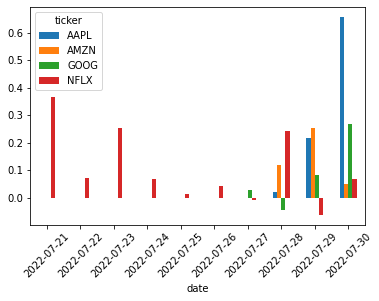

<Figure size 1080x720 with 0 Axes>

In [24]:
mean_scores.plot(kind='bar')
plt.xticks(rotation = 45)
plt.figure(figsize=(15,10))
plt.show()